# 8-Gradient boosted regression trees

- Prepared By: Ammar Nassan Alhaj Ali.
- Date: 2020-10-22.
- References: <br> 1-introduction to machine learning with python a guide for data scientists 2017 (Andreas C. Müller and Sarah Guido). <br>


- The gradient boosted regression tree is another ensemble method that combines multiple
decision trees to create a more powerful model. Despite the “regression” in the
name, these models can be used for regression and classification.
- In contrast to the
random forest approach, gradient boosting works by building trees in a serial manner,
where each tree tries to correct the mistakes of the previous one.


In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting,
we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [6]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


- Apart from the pre-pruning and the number of trees in the ensemble, another important
parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex models.

In [7]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


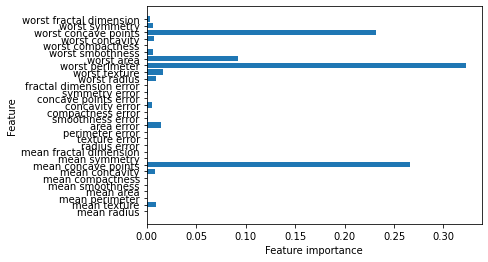

In [8]:

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

- As you can see, the random forest gives nonzero importance to many more features
than the single tree. Similarly to the single decision tree, the random forest also gives
a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter”
to be the most informative feature overall. The randomness in building the random
forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a single
tree.